In [1]:
# slow, easy-to-implement algorithm for 3D points on the sphere.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6,6

In [61]:
N = 5
n = 5
V = [[a,b,c] for a in range(-N,N) for b in range(-N,N) for c in range(-N,N) if a**2 + b**2 + c**2 == n]
V

[[-2, -1, 0],
 [-2, 0, -1],
 [-2, 0, 1],
 [-2, 1, 0],
 [-1, -2, 0],
 [-1, 0, -2],
 [-1, 0, 2],
 [-1, 2, 0],
 [0, -2, -1],
 [0, -2, 1],
 [0, -1, -2],
 [0, -1, 2],
 [0, 1, -2],
 [0, 1, 2],
 [0, 2, -1],
 [0, 2, 1],
 [1, -2, 0],
 [1, 0, -2],
 [1, 0, 2],
 [1, 2, 0],
 [2, -1, 0],
 [2, 0, -1],
 [2, 0, 1],
 [2, 1, 0]]

In [123]:
d = lambda x,y: 1*((x[0]-y[0])**2 + (x[1]-y[1])**2 + (x[2]-y[2])**2 )

In [125]:
# LOL do not use this criterion!! 

E = [[v,w] for v in V for w in V if d(v,w)== 2]

E

[[[-2, -1, 0], [-2, 0, -1]],
 [[-2, -1, 0], [-2, 0, 1]],
 [[-2, -1, 0], [-1, -2, 0]],
 [[-2, 0, -1], [-2, -1, 0]],
 [[-2, 0, -1], [-2, 1, 0]],
 [[-2, 0, -1], [-1, 0, -2]],
 [[-2, 0, 1], [-2, -1, 0]],
 [[-2, 0, 1], [-2, 1, 0]],
 [[-2, 0, 1], [-1, 0, 2]],
 [[-2, 1, 0], [-2, 0, -1]],
 [[-2, 1, 0], [-2, 0, 1]],
 [[-2, 1, 0], [-1, 2, 0]],
 [[-1, -2, 0], [-2, -1, 0]],
 [[-1, -2, 0], [0, -2, -1]],
 [[-1, -2, 0], [0, -2, 1]],
 [[-1, 0, -2], [-2, 0, -1]],
 [[-1, 0, -2], [0, -1, -2]],
 [[-1, 0, -2], [0, 1, -2]],
 [[-1, 0, 2], [-2, 0, 1]],
 [[-1, 0, 2], [0, -1, 2]],
 [[-1, 0, 2], [0, 1, 2]],
 [[-1, 2, 0], [-2, 1, 0]],
 [[-1, 2, 0], [0, 2, -1]],
 [[-1, 2, 0], [0, 2, 1]],
 [[0, -2, -1], [-1, -2, 0]],
 [[0, -2, -1], [0, -1, -2]],
 [[0, -2, -1], [1, -2, 0]],
 [[0, -2, 1], [-1, -2, 0]],
 [[0, -2, 1], [0, -1, 2]],
 [[0, -2, 1], [1, -2, 0]],
 [[0, -1, -2], [-1, 0, -2]],
 [[0, -1, -2], [0, -2, -1]],
 [[0, -1, -2], [1, 0, -2]],
 [[0, -1, 2], [-1, 0, 2]],
 [[0, -1, 2], [0, -2, 1]],
 [[0, -1, 2], [1, 0, 2]]

In [131]:
A = np.random.normal(0,1,(3,3))
A[0] = A[0]/np.sqrt(np.sum(A[0]**2))
A[1] = A[1] - A[0]*np.sum(A[0]*A[1])
A[1] = A[1]/np.sqrt(np.sum(A[1]**2))
A[2] = A[2] - A[0]*np.sum(A[0]*A[2]) - A[1]*np.sum(A[1]*A[2])
A[2] = A[2]/np.sqrt(np.sum(A[2]**2))

np.dot(A, A.T)

array([[  1.00000000e+00,   5.55111512e-17,   0.00000000e+00],
       [  5.55111512e-17,   1.00000000e+00,   2.77555756e-16],
       [  0.00000000e+00,   2.77555756e-16,   1.00000000e+00]])

In [47]:
A = np.zeros((3,3))
A[[0,1,2],[0,1,2]] = 1.0
A

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [151]:
z = np.random.normal(0,1,(2500,3))
z = np.sqrt(5)*z/np.sqrt(np.sum(z**2, axis=1) )[...,None]

v = np.dot(z, A[:,:2])

(-3, 3)

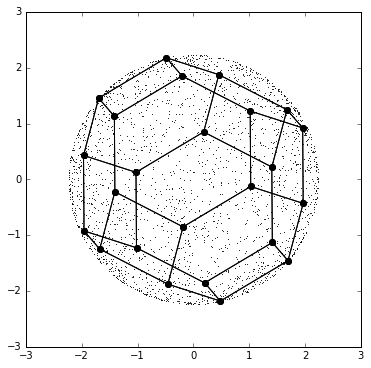

In [152]:
for e in E:
   # print e
    x = np.dot(e,A[:,:2])
    #print x
    plt.plot( x[:,0], x[:,1], 'k-')
    plt.plot( x[:,0], x[:,1], 'ko')
    
plt.plot(v[:,0], v[:,1],'k.', markersize=1)
    
    
plt.axis("Equal")
plt.xlim([-3,3])
plt.ylim([-3,3])

(-3, 3)

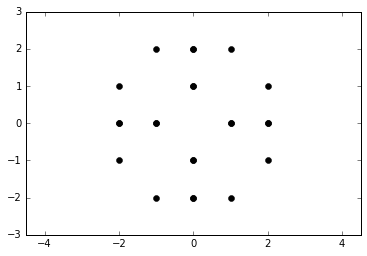

In [116]:
for v in np.dot(V,A[:,:2]):
    plt.plot(v[0], v[1], 'ko')
    
plt.axis("Equal")
plt.xlim([-3,3])
plt.ylim([-3,3])

# n = 25

In [183]:
N = 25
n = 25
V = [[a,b,c] for a in range(-N,N) for b in range(-N,N) for c in range(-N,N) if a**2 + b**2 + c**2 == n]
V

[[-5, 0, 0],
 [-4, -3, 0],
 [-4, 0, -3],
 [-4, 0, 3],
 [-4, 3, 0],
 [-3, -4, 0],
 [-3, 0, -4],
 [-3, 0, 4],
 [-3, 4, 0],
 [0, -5, 0],
 [0, -4, -3],
 [0, -4, 3],
 [0, -3, -4],
 [0, -3, 4],
 [0, 0, -5],
 [0, 0, 5],
 [0, 3, -4],
 [0, 3, 4],
 [0, 4, -3],
 [0, 4, 3],
 [0, 5, 0],
 [3, -4, 0],
 [3, 0, -4],
 [3, 0, 4],
 [3, 4, 0],
 [4, -3, 0],
 [4, 0, -3],
 [4, 0, 3],
 [4, 3, 0],
 [5, 0, 0]]

In [178]:
d = lambda x,y: 1*((x[0]-y[0])**2 + (x[1]-y[1])**2 + (x[2]-y[2])**2 )

In [184]:
E = [[v,w] for v in V for w in V if d(v,w) == 2]
E

[[[-4, -3, 0], [-3, -4, 0]],
 [[-4, 0, -3], [-3, 0, -4]],
 [[-4, 0, 3], [-3, 0, 4]],
 [[-4, 3, 0], [-3, 4, 0]],
 [[-3, -4, 0], [-4, -3, 0]],
 [[-3, 0, -4], [-4, 0, -3]],
 [[-3, 0, 4], [-4, 0, 3]],
 [[-3, 4, 0], [-4, 3, 0]],
 [[0, -4, -3], [0, -3, -4]],
 [[0, -4, 3], [0, -3, 4]],
 [[0, -3, -4], [0, -4, -3]],
 [[0, -3, 4], [0, -4, 3]],
 [[0, 3, -4], [0, 4, -3]],
 [[0, 3, 4], [0, 4, 3]],
 [[0, 4, -3], [0, 3, -4]],
 [[0, 4, 3], [0, 3, 4]],
 [[3, -4, 0], [4, -3, 0]],
 [[3, 0, -4], [4, 0, -3]],
 [[3, 0, 4], [4, 0, 3]],
 [[3, 4, 0], [4, 3, 0]],
 [[4, -3, 0], [3, -4, 0]],
 [[4, 0, -3], [3, 0, -4]],
 [[4, 0, 3], [3, 0, 4]],
 [[4, 3, 0], [3, 4, 0]]]

In [180]:
A = np.random.normal(0,1,(3,3))
A[0] = A[0]/np.sqrt(np.sum(A[0]**2))
A[1] = A[1] - A[0]*np.sum(A[0]*A[1])
A[1] = A[1]/np.sqrt(np.sum(A[1]**2))
A[2] = A[2] - A[0]*np.sum(A[0]*A[2]) - A[1]*np.sum(A[1]*A[2])
A[2] = A[2]/np.sqrt(np.sum(A[2]**2))

np.dot(A, A.T)

array([[  1.00000000e+00,   0.00000000e+00,   2.11636264e-16],
       [  0.00000000e+00,   1.00000000e+00,  -2.70616862e-16],
       [  2.11636264e-16,  -2.70616862e-16,   1.00000000e+00]])

In [186]:
z = np.random.normal(0,1,(2500,3))
z = np.sqrt(25)*z/np.sqrt(np.sum(z**2, axis=1) )[...,None]

w = np.dot(z, A[:,:2])

(-7.5, 7.5)

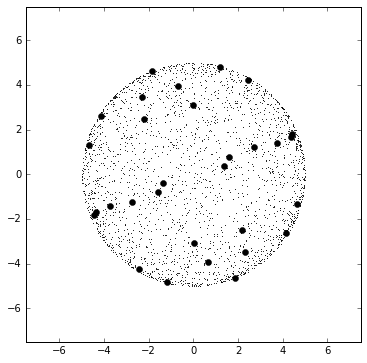

In [191]:
v = np.dot(V, A[:,:2])
plt.plot( v[:,0], v[:,1], 'ko')

for e in E:
   # print e
    x = np.dot(e, A[:,:2])
    #print x
    #plt.plot( x[:,0], x[:,1], 'k-')
    #plt.plot( x[:,0], x[:,1], 'ko')
    
plt.plot(w[:,0], w[:,1],'k.', markersize=1)
    
    
plt.axis("Equal")
plt.xlim([-1.5*np.sqrt(N), 1.5*np.sqrt(N)])
plt.ylim([-1.5*np.sqrt(N), 1.5*np.sqrt(N)])

In [194]:
V = np.array(V)
V[2], V[4]

(array([-4,  0, -3]), array([-4,  3,  0]))

In [252]:
# this is a hyperplane
a,b,c = V[2], 0.5*(V[2] + V[4]), V[4]

m = np.shape(V)[0]

for i in range(m):
    for j in range(i):
        #print 1,
        #print np.sum(1*(np.dot(V,0.5*(V[i]+V[j]) > 0))),
        H = 1*(np.dot(V,0.5*(V[i]+V[j])) > ( np.sqrt(np.sum(0.5*(V[i]+V[j]))**2) )*np.sqrt(np.sum(0.5*(V[i]+V[j]))**2))
        print np.sum(H), 
    print
m


0
0 0
8 5 1
8 1 5 15
0 0 0 5 1
0 0 0 1 5 0
13 9 8 14 14 9 5
13 8 9 14 14 5 9 13
0 0 0 8 3 0 0 10 8
0 0 0 0 0 0 0 4 2 0
8 5 0 13 14 5 0 14 14 8 1
0 0 0 0 0 0 0 2 4 0 0 1
10 9 4 14 14 9 2 15 14 13 8 14 5
0 0 0 3 8 0 0 8 10 0 0 3 0 8
14 13 14 13 10 13 14 8 8 14 14 13 14 8 0
8 0 5 14 13 0 5 14 14 3 1 12 1 0 8 8
13 14 14 9 9 14 14 5 5 14 14 8 0 1 14 0 5
10 4 9 14 14 2 9 14 15 8 5 0 8 12 13 3 14 1
13 14 14 9 9 14 14 5 5 14 0 5 14 1 14 0 8 0 1
14 14 13 10 13 14 13 8 8 0 14 8 14 3 14 0 13 0 8 0
3 1 0 14 12 1 0 14 0 8 5 15 5 14 8 10 14 4 14 2 8
3 0 1 12 14 0 1 0 14 8 5 14 5 14 8 8 15 2 14 4 10 13
14 14 14 8 4 14 0 1 0 13 14 9 14 5 14 0 2 0 0 0 0 9 5
14 14 14 4 8 0 14 0 1 14 14 2 14 0 13 0 9 0 5 0 0 5 9 0
8 5 2 14 0 8 4 14 12 13 9 14 9 13 10 8 14 0 14 0 3 14 14 5 1
8 2 5 0 14 4 8 12 14 10 9 14 9 14 13 3 14 0 13 0 8 14 14 1 5 15
14 14 0 5 2 14 14 1 0 13 14 9 14 5 14 0 4 0 0 0 0 9 8 0 0 5 1
14 0 14 2 5 14 14 0 1 14 14 4 14 0 13 0 9 0 5 0 0 8 9 0 0 1 5 0
0 14 14 8 8 14 14 3 3 14 13 10 13 8 14 0 10

30

In [288]:
N = 25
n = 25
V = [[a,b,c] for a in range(-N,N) for b in range(-N,N) for c in range(-N,N) if a**2 + b**2 + c**2 == n]
V = np.array(V)

m = np.shape(V)[0]

E = []

for i in range(m):
    for j in range(i):
        #print 1,
        #print np.sum(1*(np.dot(V,0.5*(V[i]+V[j]) > 0))),
        midpt = 0.5*(V[i] + V[j])
        norm  = np.sqrt(np.sum(midpt**2))
        H = np.sum(1*(np.dot(V, midpt)  >  norm**2 ))
        
        print H,
        
        #H = 1*(np.dot(V,0.5*(V[i]+V[j])) > ( np.sqrt(np.sum(0.5*(V[i]+V[j]))**2) )*np.sqrt(np.sum(0.5*(V[i]+V[j]))**2))
        if np.sum(H)== 0 and norm > 0:
            E += [[ list(V[i]), list(V[j])]]
    print
  



0
0 0
0 0 1
0 1 0 0
1 0 1 1 4
1 1 0 4 1 2
1 1 4 0 1 2 5
1 4 1 1 0 5 2 2
2 1 4 4 7 0 4 4 8
4 1 2 4 9 0 1 9 12 0
4 1 4 2 9 0 9 1 12 0 1
4 2 1 9 4 1 0 12 9 1 0 4
4 2 9 1 4 1 12 0 9 1 4 0 5
2 4 1 7 4 4 0 8 4 2 1 7 0 8
2 4 7 1 4 4 8 0 4 2 7 1 8 0 0
4 4 1 9 2 9 0 12 1 7 4 12 1 0 0 8
4 4 9 1 2 9 12 0 1 7 12 4 0 1 8 0 5
4 9 2 4 1 12 1 9 0 8 5 0 4 12 1 7 0 4
4 9 4 2 1 12 9 1 0 8 0 5 12 4 7 1 4 0 1
2 7 4 4 1 8 4 4 0 0 8 8 7 7 2 2 1 1 0 0
7 4 9 9 12 1 4 4 0 0 0 0 1 1 4 4 9 9 12 12 8
7 9 4 12 9 4 1 0 4 4 1 9 0 12 0 8 0 12 1 9 4 2
7 9 12 4 9 4 0 1 4 4 9 1 12 0 8 0 12 0 9 1 4 2 5
7 12 9 9 4 0 4 4 1 8 12 12 9 9 4 4 1 1 0 0 0 5 2 2
8 5 12 12 0 4 9 9 12 1 1 1 2 2 4 4 4 4 9 9 7 0 1 1 4
8 12 5 0 12 9 4 12 9 4 2 4 1 9 1 7 1 9 2 4 4 1 0 4 1 0
8 12 0 5 12 9 12 4 9 4 4 2 9 1 7 1 9 1 4 2 4 1 4 0 1 0 1
8 0 12 12 5 12 9 9 4 7 9 9 4 4 4 4 2 2 1 1 1 4 1 1 0 1 0 0
0 8 8 8 8 7 7 7 7 2 4 4 4 4 2 2 4 4 4 4 2 1 1 1 1 0 0 0 0


(-6.25, 6.25)

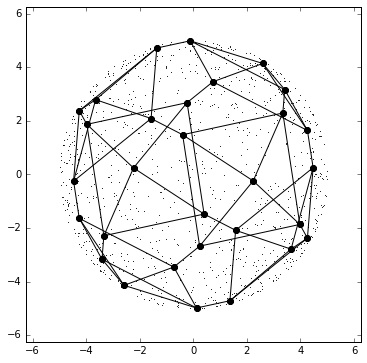

In [301]:
#for e in E:
#    print e


#A = np.zeros((3,3))
#A[[0,1,2],[0,1,2]] = 1.0

A = np.random.normal(0,1,(3,3))
A[0] = A[0]/np.sqrt(np.sum(A[0]**2))
A[1] = A[1] - A[0]*np.sum(A[0]*A[1])
A[1] = A[1]/np.sqrt(np.sum(A[1]**2))
A[2] = A[2] - A[0]*np.sum(A[0]*A[2]) - A[1]*np.sum(A[1]*A[2])
A[2] = A[2]/np.sqrt(np.sum(A[2]**2))

for e in E:
    x = np.dot( e, A[:,:2])
    #print x
    
    plt.plot( x[:,0], x[:,1], 'k-')
    plt.plot( x[:,0], x[:,1], 'ko')
    
z = np.random.normal(0,1,(1000,3))
z = np.sqrt(25)*z/np.sqrt(np.sum(z**2, axis=1) )[...,None]
w = np.dot(z, A[:,:2])

plt.plot(w[:,0], w[:,1],'k.', markersize=1)
    
    
plt.axis("Equal")
plt.xlim([-1.25*np.sqrt(N), 1.25*np.sqrt(N)])
plt.ylim([-1.25*np.sqrt(N), 1.25*np.sqrt(N)])

In [219]:
N = 10**3

x = (np.arange(N)//10**0)%10
y = (np.arange(N)//10**1)%10
z = (np.arange(N)//10**2)%10

r = np.sqrt(x**2 + y**2 + z**2)

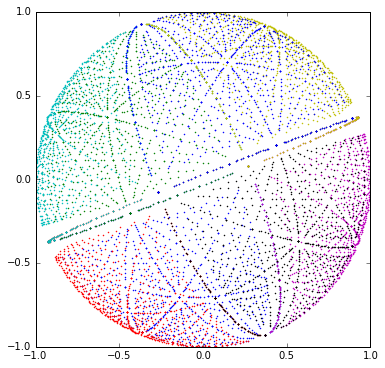

In [233]:

for a in [-1,1]:
    for b in [-1,1]:
        for c in [-1,1]:
            X = np.vstack( (a*x[1:]/r[1:],b*y[1:]/r[1:],c*z[1:]/r[1:]))
            Z = np.dot(X.T, A[:,:2])
            plt.plot( 1*Z[:,0], 1*Z[:,1], '.', markersize=2)


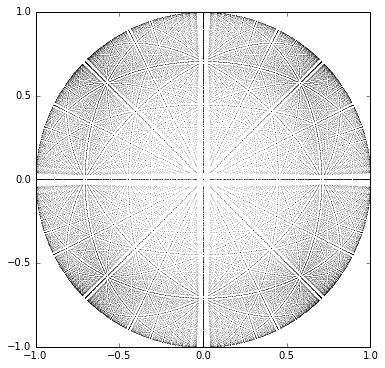

In [242]:
A = np.zeros((3,3))
A[[0,1,2],[0,1,2]] = 1.0

M = 25

N = M**3

x = (np.arange(N)//M**0)%M
y = (np.arange(N)//M**1)%M
z = (np.arange(N)//M**2)%M

r = np.sqrt(x**2 + y**2 + z**2)

for a in [-1,1]:
    for b in [-1,1]:
        for c in [1]:
            X = np.vstack( (a*x[1:]/r[1:],b*y[1:]/r[1:],c*z[1:]/r[1:]))
            Z = np.dot(X.T, A[:,:2])
            plt.plot( 1*Z[:,0], 1*Z[:,1], 'k.', markersize=0.25)

In [ ]:
# trying to reproduce this rational points on the sphere
# http://mathoverflow.net/questions/125224/rational-points-on-a-sphere-in-mathbbrd/125391#125391
# (1,0,0) is a point on the sphere.  And I can pass with unit slope.  any line with rational slope